In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

In [2]:
muB=9.274e-24
AMU=1.66e-27
m171 = 171*AMU
fieldGrad = (2e-4)/(1e-2)
w0 = 0.01
Is556 = (0.139e-3)*(1e4)
Is399 = (59.97e-3)*(1e4)
l556 = 556e-9
l399 = 399e-9
k556 = 2*np.pi/l556
k399 = 2*np.pi/l399
gamma556 = 2*np.pi*180e3
gamma399 = 2*np.pi*30e6
Td = sc.hbar*gamma556/(2*sc.k)

capture velocity estimate:

$$
\frac{1}{2} m v^2 = \frac{\hbar k \Gamma}{2} d
$$

$$
v_c = \sqrt{\frac{\hbar k \Gamma d}{m}}
$$

MOT parameters:

In [3]:
def Beta(s0, delta, k, gamma):
    return 8*sc.hbar*(k**2)*delta*s0/(gamma * ((1 + s0 + (2*delta/gamma)**2)**2) )

def F(s0, delta, k, gamma, v, muEff, Bp, x):
    b = Beta(s0, delta, k, gamma)
    kappa = muEff*Bp*b/(sc.hbar*k)
    return -b*v - kappa*x

def vcMOT(d):
    return np.sqrt(sc.hbar*k556*gamma556*d/m171)

# test RK4 in 1D MOT damped oscillator limit

In [4]:
s0 = 400
delta = 35*gamma556
k = k556
gamma = gamma556
Bp = fieldGrad
muEff = 1.5*muB

def F1D(x,v):
    return F(s0, delta, k, gamma, v, muEff, Bp, x)

In [5]:
b = Beta(s0, delta, k, gamma)
kappa = muEff*Bp*b/(sc.hbar*k)
b, kappa

(5.367706012355765e-23, 1.2531291635988157e-20)

In [301]:
def dampedOsc(x0, v0, t):
    m = m171
    b = Beta(s0, delta, k, gamma)
    kappa = muEff*Bp*b/(sc.hbar*k)
    omega0 = np.sqrt(kappa/m171)
    omega = np.sqrt(omega0**2 - (b/(2*m))**2)
    x = np.exp(-b*t/(2*m))*(x0*np.cos(omega*t) + ((v0+(b/(2*m))*x0)/omega)*np.sin(omega*t))
    return x

In [302]:
def RK41D(x0, v0, dt, N):
    xn, vn, Fn = np.zeros(N), np.zeros(N), np.zeros(N)
    xn[0], vn[0] = x0, v0
    for n in range(N-1):
        Fn[n] = F1D(xn[n], vn[n])
        k1, l1 = dt*F1D(xn[n], vn[n])/m171, dt*vn[n]
        k2, l2 = dt*F1D(xn[n] + l1/2, vn[n] + k1/2)/m171, dt*(vn[n] + k1/2)
        k3, l3 = dt*F1D(xn[n] + l2/2, vn[n] + k2/2)/m171, dt*(vn[n] + k2/2)
        k4, l4 = dt*F1D(xn[n] + l3, vn[n] + k3)/m171, dt*(vn[n] + k3)
        xn[n+1] = xn[n] + (1/6)*(l1 + 2*l2 + 2*l3 + l4)
        vn[n+1] = vn[n] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    return xn, vn, Fn

In [304]:
dt = 5e-5
N = 2000
t = np.arange(0,dt*N,dt)
xn, vn, Fn = RK41D(0.02, 0, dt, N)
xnA = dampedOsc(0.02, 0, t)

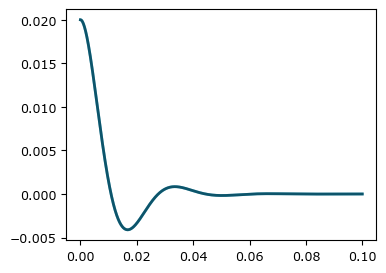

In [305]:
plt.plot(t, xnA)
plt.plot(t, xn, 'k', alpha=0.5)

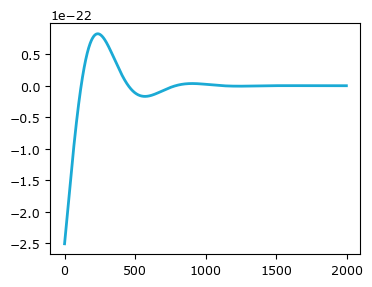

In [306]:
plt.plot(Fn)